# N-Body Choreography

This Jupyter notebook contains all the extension part of the mini-project. We will be simulating the choreography system which includes the Lagrange's equilateral solution, Figure-Eight periodic solution and two Braids periodic solution. 

## 10th of March 2023

### Lagrange's equilateral solution for 3 body Problem
In this section, we will simulate the 3-Body choreography having a shape of a unit circle. This is known as the Lagrange's equilateral solution for 3-Body Problem.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(r1,r2,m1,m2):
    """Force function is define to be used repeatly throughout the mini-projection 
    to calculate the force of one body on other body.
    
    Inputs:
    r1 - position of mass 1
    r2 - position of mass 2
    m1 - mass 1
    m2 - mass 2
    # G is defined outside of this function
    
    Returns:
    Force - force experienced by mass 1
    
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    
    
    mag_r12 = np.linalg.norm(r2-r1) # np.linalg.norm helps to find the magnitude of a vector
    f_on_m1 = G*m1*m2*r12/(mag_r12**3)
    return f_on_m1

In [3]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 50000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)

# remember that the initial centre of mass is r1_v[0]

# Initial condition explanations
''' Lagrange solution consists of placing the same mass object in a equilateral triangle configuration with 
zero initial velocity'''


# Using radial and polar angle to find the initial three vertices
''' Placing the first object on (1,0) along the positive axis then rotate the first object by 120 degrees
then another 120 degrees to obtain the position of the second and third object respectively'''

Obj_1_r[0] = np.array([1,0])
Obj_2_r[0] = np.array([np.cos(2*np.pi/3),np.sin(2*np.pi/3)])
Obj_3_r[0] = np.array([np.cos(4*np.pi/3),np.sin(4*np.pi/3)])

'''Equating the required centripetal force and gravitational force on the body by the other two bodies
v = sqrt (2) / distance from body 1 to body 2, this is obtained by the constraint on the position of the
body which is required to be on the vertices of an equilateral triangle. '''
v_1 = np.sqrt(2 *np.cos(np.pi/6) /3)

# body 2 and 3 have the same speed but different velocity just have to resolve v_1 in the right direction
                     
Obj_1_v[0] = np.array([0,-v_1])
Obj_2_v[0] = np.array([v_1*np.cos(np.pi/6), v_1*np.sin(np.pi/6)])
Obj_3_v[0] = np.array([-v_1*np.sin(np.pi/3), v_1*np.cos(np.pi/3)])

### Problem Solved 10th March 2023 
Trying to find the initial velocity of the bodies but failed due to not resolving the force along the centripetal force direction which leads to over-estimated initial velocity and unstable orbits.

In [4]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    # Kinetic Energy Calculation
    KE_LS[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               +(0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2)))
    
    # Potential Energy Calculation
    
    PE_LS[i]=( (-G*m1*m2/ np.linalg.norm(Obj_2_r[i]-Obj_1_r[i]) ) +(-G*m1*m3/ np.linalg.norm(Obj_1_r[i]-Obj_3_r[i]) )
          + (-G*m2*m1/ np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]) ))
    L_LS[i] =( np.linalg.norm(np.cross(Obj_1_r[i],Obj_1_v[i]))
                +np.linalg.norm(np.cross(Obj_2_r[i],Obj_2_v[i]))
                +np.linalg.norm(np.cross(Obj_3_r[i],Obj_3_v[i])) ) 
    
    

    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_LS[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )
            + (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)) +(0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)))

PE_LS[-1]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1]) ) +(-G*m1*m3/ np.linalg.norm(Obj_1_r[-1]-Obj_3_r[-1]) )
          + (-G*m2*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]) ) )
             
L_LS[-1] =( np.linalg.norm(np.cross(Obj_1_r[-1],Obj_1_v[-1]))
                +np.linalg.norm(np.cross(Obj_2_r[-1],Obj_2_v[-1]))
                +np.linalg.norm(np.cross(Obj_3_r[-1],Obj_3_v[-1])))


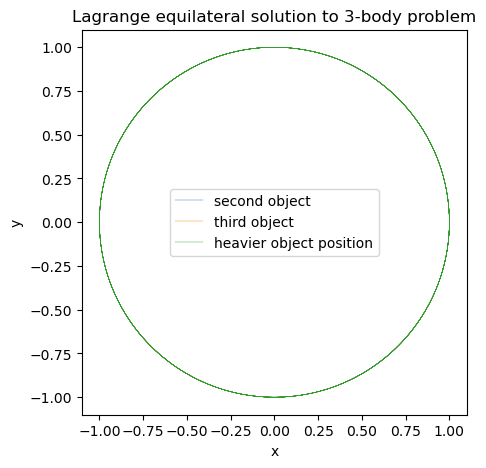

In [5]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='second object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='third object ',lw=0.3)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='heavier object position',lw=0.3)
ax.set_title('Lagrange equilateral solution to 3-body problem' )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.gca().set_aspect(1)



Text(0, 0.5, 'Total Energy in Joules')

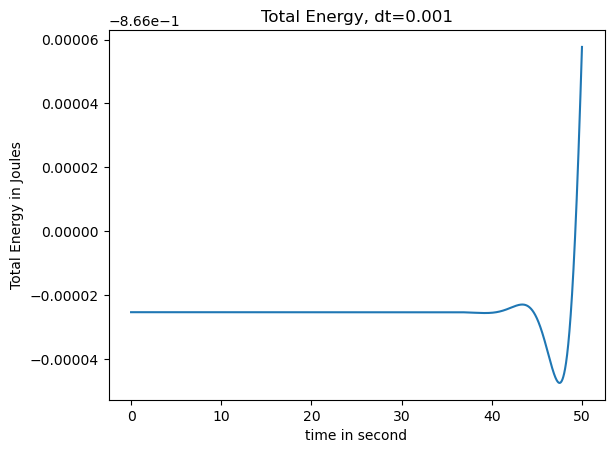

In [6]:

time=np.linspace(0,N*dt,N)
Total_Energy_LS = PE_LS+KE_LS
plt.plot(time,Total_Energy_LS)
plt.title('Total Energy, dt=0.001')
plt.xlabel('time in second')
plt.ylabel('Total Energy in Joules')

Text(0, 0.5, 'Angular Momentum in Kg.m2.s-1')

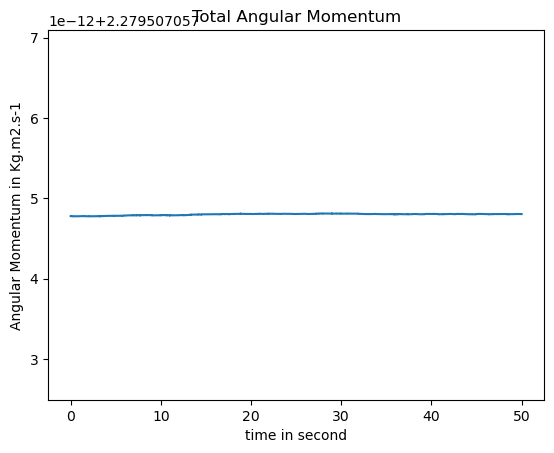

In [7]:
plt.plot(time,L_LS)
plt.title('Total Angular Momentum')
plt.xlabel('time in second')
plt.ylabel('Angular Momentum in Kg.m2.s-1')



###  Discussion
We have shown from above plots that the choreography is stable and obeys the conservation laws very well. The Total angular momentum and Total energy only fluctuates on order of -12 and -6 respectively. The choreography generated here is only stable for 60000 timestep roughly 60 seconds. From both the Kinetic, Potential and Total energy, we can observe that the period of the orbit is roughly around 8300 time step which corresponds to 8.3 second.


## Additional Perturbation to the stable system
Exploring other orbits with different initial velocity by adding small perturbation to the previous initial condition for 3-body unit circle choregraphy. One with roughly 1.20 times larger initial velocity.

In [8]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 240000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)

# remember that the initial centre of mass is r1_v[0]

# Initial condition explanations
''' Lagrange solution consists of placing the same mass object in a equilateral triangle configuration with 
zero initial velocity'''


# Using radial and polar angle to find the initial three vertices
''' Placing the first object on (1,0) along the positive axis then rotate the first object by 120 degrees
then another 120 degrees to obtain the position of the second and third object respectively'''

Obj_1_r[0] = np.array([1,0])
Obj_2_r[0] = np.array([np.cos(2*np.pi/3),np.sin(2*np.pi/3)])
Obj_3_r[0] = np.array([np.cos(4*np.pi/3),np.sin(4*np.pi/3)])


v_1 = 1.2*np.sqrt(2/3)


# body 2 and 3 have the same speed but different velocity just have to resolve v_1 in the right direction
                     
Obj_1_v[0] = np.array([0,-v_1])
Obj_2_v[0] = np.array([v_1*np.cos(np.pi/6), v_1*np.sin(np.pi/6)])
Obj_3_v[0] = np.array([-v_1*np.sin(np.pi/3), v_1*np.cos(np.pi/3)])

In [9]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    # Kinetic Energy Calculation
    KE_LS[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               +(0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2)))
    
    # Potential Energy Calculation
    
    PE_LS[i]=( (-G*m1*m2/ np.linalg.norm(Obj_2_r[i]-Obj_1_r[i]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-G*m2*m3/ np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]) ) )
    
    L_LS[i] =( np.linalg.norm(np.cross(Obj_1_r[i],Obj_1_v[i]))
                +np.linalg.norm(np.cross(Obj_2_r[i],Obj_2_v[i]))
                +np.linalg.norm(np.cross(Obj_3_r[i],Obj_3_v[i])) )             

    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_LS[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)) +(0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)))

PE_LS[-1]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-G*m2*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]) ))
            
L_LS[-1] =( np.linalg.norm(np.cross(Obj_1_r[-1],Obj_1_v[-1]))
                +np.linalg.norm(np.cross(Obj_2_r[-1],Obj_2_v[-1]))
                +np.linalg.norm(np.cross(Obj_3_r[-1],Obj_3_v[-1])))

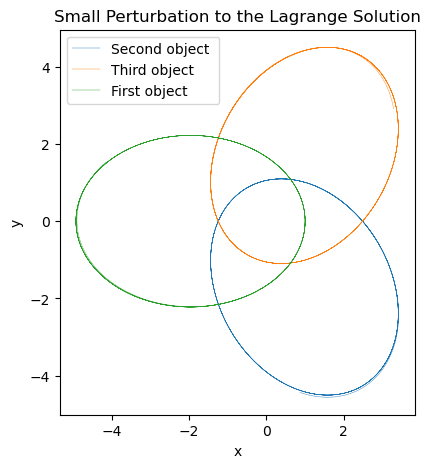

In [10]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='Second object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='Third object ',lw=0.3)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='First object',lw=0.3)
ax.set_title('Small Perturbation to the Lagrange Solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.gca().set_aspect(1)

Text(0, 0.5, 'Total Energy in Joules')

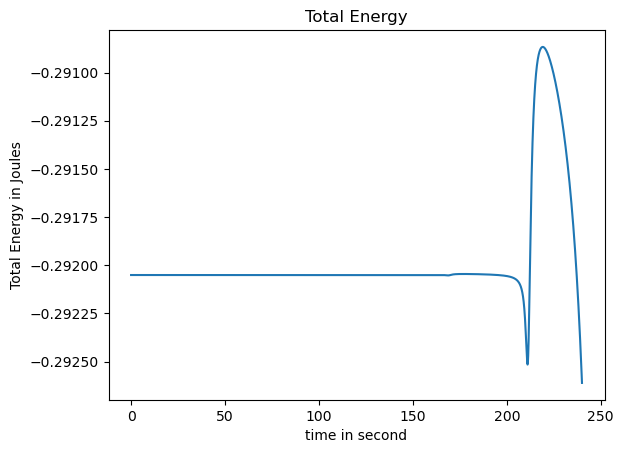

In [11]:
time=np.linspace(0,N*dt,N)

Total_Energy_LS = PE_LS+KE_LS
plt.plot(time,Total_Energy_LS)
plt.title('Total Energy')
plt.xlabel('time in second')
plt.ylabel('Total Energy in Joules')

Text(0, 0.5, 'Angular momentum in Kg.m2.s-1')

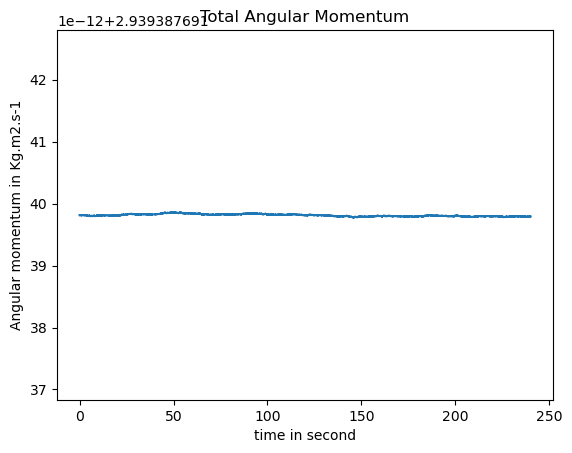

In [12]:
plt.plot(time,L_LS)
plt.title('Total Angular Momentum')
plt.xlabel('time in second')
plt.ylabel('Angular momentum in Kg.m2.s-1')


### Discussion 
This is still the lagrange equilateral solution as the orbit is constrainted by 3 vertices of an equilateral triangle and it maintains a stable elliptical orbit for 250 seconds.

## Extending to N-body Choreography
All Bodies shares a common single circular path constrainted by the vertices of a 8-sided polygon. 

In [13]:
# Same mass 
m1=1
m2=1
m3=1
m4=1
m5=1
m6=1
m7=1
m8=1

N= 10500
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities for all the eight bodies

Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_2_v = np.zeros((N,Ndim))

Obj_3_r = np.zeros((N,Ndim))
Obj_3_v = np.zeros((N,Ndim))

Obj_4_r = np.zeros((N,Ndim))
Obj_4_v = np.zeros((N,Ndim))

Obj_5_r = np.zeros((N,Ndim))
Obj_5_v = np.zeros((N,Ndim))

Obj_6_r = np.zeros((N,Ndim))
Obj_6_v = np.zeros((N,Ndim))

Obj_7_r = np.zeros((N,Ndim))
Obj_7_v = np.zeros((N,Ndim))

Obj_8_r = np.zeros((N,Ndim))
Obj_8_v = np.zeros((N,Ndim))

# Total energy and angular momentum storage

KE_8_C= np.zeros(N)
PE_8_C= np.zeros(N)
L_8_C= np.zeros(N)

# remember that the initial centre of mass is r1_v[0]

# Initial condition explanations
'''The eight bodies are moving such that they share the same orbit and constrained by the vertices of a
8-sided polygon
'''

Obj_1_r[0] = np.array([1,0])
Obj_2_r[0] = np.array([np.cos(np.pi/4),np.sin(np.pi/4)])
Obj_3_r[0] = np.array([np.cos(2*np.pi/4),np.sin(2*np.pi/4)])
Obj_4_r[0] = np.array([np.cos(3*np.pi/4),np.sin(3*np.pi/4)])
Obj_5_r[0] = np.array([np.cos(4*np.pi/4),np.sin(4*np.pi/4)])
Obj_6_r[0] = np.array([np.cos(5*np.pi/4),np.sin(5*np.pi/4)])
Obj_7_r[0] = np.array([np.cos(6*np.pi/4),np.sin(6*np.pi/4)])
Obj_8_r[0] = np.array([np.cos(7*np.pi/4),np.sin(7*np.pi/4)])


'''
Calculating the initial velocity of the first body from equating the centripetal force required for a circular 
orbit with the force from the other 7 bodies resolved along the direction of the centripetal force.
'''
V = (np.sqrt ( ( 2*np.cos(3*np.pi/8)/ (2- np.sqrt(2)) ) + (np.cos(np.pi/4)) 
             + ( 2 * np.cos(np.pi/8) / (2+np.sqrt(2))) + (1/4) ))

''' 
The other bodies initial velocity have the same initial angular velocity but have to resolve along the horizontal 
and vertical direction.
'''           

Obj_1_v[0] = np.array([0,-V])
Obj_2_v[0] = np.array([ V*np.sin(np.pi/4), -V*np.cos(np.pi/4)])
Obj_3_v[0] = np.array([V,0])
Obj_4_v[0] = np.array([V*np.cos(np.pi/4), V*np.sin(np.pi/4)])
Obj_5_v[0] = np.array([0,V])
Obj_6_v[0] = np.array([-V*np.sin(np.pi/4), V*(np.cos(np.pi/4))])
Obj_7_v[0] = np.array([-V,0])
Obj_8_v[0] = np.array([-V *np.cos(np.pi/4), -V*np.sin(np.pi/4)])

Text(0, 0.5, 'y')

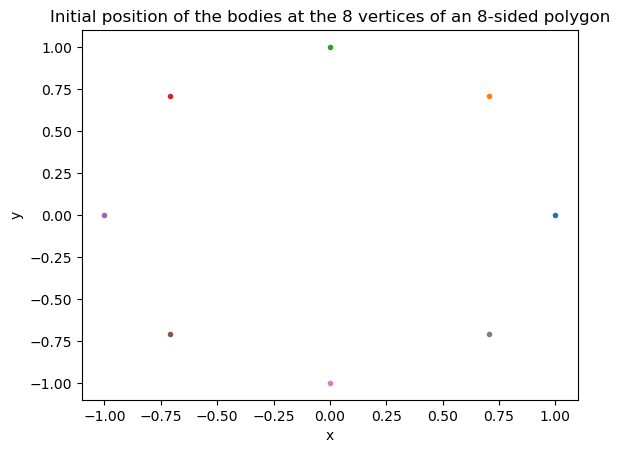

In [14]:
plt.plot(Obj_1_r[0,0],Obj_1_r[0,1],marker='.')
plt.plot(Obj_2_r[0,0],Obj_2_r[0,1],marker='.')
plt.plot(Obj_3_r[0,0],Obj_3_r[0,1],marker='.')
plt.plot(Obj_4_r[0,0],Obj_4_r[0,1],marker='.')
plt.plot(Obj_5_r[0,0],Obj_5_r[0,1],marker='.')
plt.plot(Obj_6_r[0,0],Obj_6_r[0,1],marker='.')
plt.plot(Obj_7_r[0,0],Obj_7_r[0,1],marker='.')
plt.plot(Obj_8_r[0,0],Obj_8_r[0,1],marker='.')
plt.title('Initial position of the bodies at the 8 vertices of an 8-sided polygon')
plt.xlabel('x')
plt.ylabel('y')

### Propagation using Velocity Verlet Integrator

In [15]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = ( force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
                  + force(Obj_1_r[i], Obj_4_r[i], m1 , m4) + force(Obj_1_r[i], Obj_5_r[i], m1 , m5)
                  + force(Obj_1_r[i], Obj_6_r[i], m1 , m6) + force(Obj_1_r[i], Obj_7_r[i], m1 , m7)
                  + force(Obj_1_r[i], Obj_8_r[i], m1 , m8)    )
    
    Force_on_2 = ( force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
                  + force(Obj_2_r[i], Obj_4_r[i], m4 , m2) + force(Obj_2_r[i], Obj_5_r[i], m5 , m2)
                  + force(Obj_2_r[i], Obj_6_r[i], m6 , m2) + force(Obj_2_r[i], Obj_7_r[i], m7 , m2)
                  + force(Obj_2_r[i], Obj_8_r[i], m8 , m2)
                  
                 )
    
    
    Force_on_3 = ( force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
                  + force(Obj_3_r[i], Obj_4_r[i], m4 , m3) + force(Obj_3_r[i], Obj_5_r[i], m5 , m3)
                  + force(Obj_3_r[i], Obj_6_r[i], m6 , m3) + force(Obj_3_r[i], Obj_7_r[i], m7 , m3)
                  + force(Obj_3_r[i], Obj_8_r[i], m8 , m3)
                 )
    
    Force_on_4 = ( force(Obj_4_r[i], Obj_1_r[i], m1 , m4) + force(Obj_4_r[i],Obj_2_r[i],m2,m4)
                  + force(Obj_4_r[i], Obj_3_r[i], m4 , m3) + force(Obj_4_r[i], Obj_5_r[i], m5 , m4)
                  + force(Obj_4_r[i], Obj_6_r[i], m6 , m4) + force(Obj_4_r[i], Obj_7_r[i], m4 , m7)
                  + force(Obj_4_r[i], Obj_8_r[i], m4 , m8)
                 )
    
    Force_on_5 = ( force(Obj_5_r[i], Obj_1_r[i], m1 , m5) + force(Obj_5_r[i],Obj_2_r[i],m2,m5)
                  + force(Obj_5_r[i], Obj_3_r[i], m5 , m3) + force(Obj_5_r[i], Obj_4_r[i], m5 , m4)
                  + force(Obj_5_r[i], Obj_6_r[i], m5 , m6) + force(Obj_5_r[i], Obj_7_r[i], m5 , m7)
                  + force(Obj_5_r[i], Obj_8_r[i], m5 , m8)
                 )
    
    Force_on_6 = ( force(Obj_6_r[i], Obj_1_r[i], m1 , m6) + force(Obj_6_r[i],Obj_2_r[i],m2,m6)
                  + force(Obj_6_r[i], Obj_3_r[i], m6 , m3) + force(Obj_6_r[i], Obj_4_r[i], m6 , m4)
                  + force(Obj_6_r[i], Obj_5_r[i], m6 , m5) + force(Obj_6_r[i], Obj_7_r[i], m6 , m7)
                  + force(Obj_6_r[i], Obj_8_r[i], m6 , m8)
                 )
    
    Force_on_7 = ( force(Obj_7_r[i], Obj_1_r[i], m1 , m7) + force(Obj_7_r[i],Obj_2_r[i],m2,m7)
                  + force(Obj_7_r[i], Obj_3_r[i], m7 , m3) + force(Obj_7_r[i], Obj_4_r[i], m7 , m4)
                  + force(Obj_7_r[i], Obj_5_r[i], m7 , m5) + force(Obj_7_r[i], Obj_6_r[i], m7 , m6)
                  + force(Obj_7_r[i], Obj_8_r[i], m7 , m8)
                 )
    
    Force_on_8 = ( force(Obj_8_r[i], Obj_1_r[i], m1 , m8) + force(Obj_8_r[i],Obj_2_r[i],m2,m8)
                  + force(Obj_8_r[i], Obj_3_r[i], m8 , m3) + force(Obj_8_r[i], Obj_4_r[i], m8 , m4)
                  + force(Obj_8_r[i], Obj_5_r[i], m8 , m5) + force(Obj_8_r[i], Obj_6_r[i], m8 , m6)
                  + force(Obj_8_r[i], Obj_7_r[i], m8 , m7)
                 )
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    Obj_4_r[i+1] = Obj_4_r[i] + (dt* Obj_4_v[i]) + (dt**2) * (Force_on_4/(2*m4))
    Obj_5_r[i+1] = Obj_5_r[i] + (dt* Obj_5_v[i]) + (dt**2) * (Force_on_5/(2*m5))
    Obj_6_r[i+1] = Obj_6_r[i] + (dt* Obj_6_v[i]) + (dt**2) * (Force_on_6/(2*m6))
    Obj_7_r[i+1] = Obj_7_r[i] + (dt* Obj_7_v[i]) + (dt**2) * (Force_on_7/(2*m7))
    Obj_8_r[i+1] = Obj_8_r[i] + (dt* Obj_8_v[i]) + (dt**2) * (Force_on_8/(2*m8))
    
    # Forces on objects at step i+1
    
    Force_on_1_ip1 = ( force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
                  + force(Obj_1_r[i+1], Obj_4_r[i+1], m1 , m4) + force(Obj_1_r[i+1], Obj_5_r[i+1], m1 , m5)
                  + force(Obj_1_r[i+1], Obj_6_r[i+1], m1 , m6) + force(Obj_1_r[i+1], Obj_7_r[i+1], m1 , m7)
                  + force(Obj_1_r[i+1], Obj_8_r[i+1], m1 , m8)    )
    
    Force_on_2_ip1 = ( force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
                  + force(Obj_2_r[i+1], Obj_4_r[i+1], m4 , m2) + force(Obj_2_r[i+1], Obj_5_r[i+1], m5 , m2)
                  + force(Obj_2_r[i+1], Obj_6_r[i+1], m6 , m2) + force(Obj_2_r[i+1], Obj_7_r[i+1], m7 , m2)
                  + force(Obj_2_r[i+1], Obj_8_r[i+1], m8 , m2)
                  
                 )
    
    
    Force_on_3_ip1 = ( force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
                  + force(Obj_3_r[i+1], Obj_4_r[i+1], m4 , m3) + force(Obj_3_r[i+1], Obj_5_r[i+1], m5 , m3)
                  + force(Obj_3_r[i+1], Obj_6_r[i+1], m6 , m3) + force(Obj_3_r[i+1], Obj_7_r[i+1], m7 , m3)
                  + force(Obj_3_r[i+1], Obj_8_r[i+1], m8 , m3)
                 )
    
    Force_on_4_ip1 = ( force(Obj_4_r[i+1], Obj_1_r[i+1], m1 , m4) + force(Obj_4_r[i+1],Obj_2_r[i+1],m2,m4)
                  + force(Obj_4_r[i+1], Obj_3_r[i+1], m4 , m3) + force(Obj_4_r[i+1], Obj_5_r[i+1], m5 , m4)
                  + force(Obj_4_r[i+1], Obj_6_r[i+1], m6 , m4) + force(Obj_4_r[i+1], Obj_7_r[i+1], m4 , m7)
                  + force(Obj_4_r[i+1], Obj_8_r[i+1], m4 , m8)
                 )
    
    Force_on_5_ip1 = ( force(Obj_5_r[i+1], Obj_1_r[i+1], m1 , m5) + force(Obj_5_r[i+1],Obj_2_r[i+1],m2,m5)
                  + force(Obj_5_r[i+1], Obj_3_r[i+1], m5 , m3) + force(Obj_5_r[i+1], Obj_4_r[i+1], m5 , m4)
                  + force(Obj_5_r[i+1], Obj_6_r[i+1], m5 , m6) + force(Obj_5_r[i+1], Obj_7_r[i+1], m5 , m7)
                  + force(Obj_5_r[i+1], Obj_8_r[i+1], m5 , m8)
                 )
    
    Force_on_6_ip1 = ( force(Obj_6_r[i+1], Obj_1_r[i+1], m1 , m6) + force(Obj_6_r[i+1],Obj_2_r[i+1],m2,m6)
                  + force(Obj_6_r[i+1], Obj_3_r[i+1], m6 , m3) + force(Obj_6_r[i+1], Obj_4_r[i+1], m6 , m4)
                  + force(Obj_6_r[i+1], Obj_5_r[i+1], m6 , m5) + force(Obj_6_r[i+1], Obj_7_r[i+1], m6 , m7)
                  + force(Obj_6_r[i+1], Obj_8_r[i+1], m6 , m8)
                 )
    
    Force_on_7_ip1 = ( force(Obj_7_r[i+1], Obj_1_r[i+1], m1 , m7) + force(Obj_7_r[i+1],Obj_2_r[i+1],m2,m7)
                  + force(Obj_7_r[i+1], Obj_3_r[i+1], m7 , m3) + force(Obj_7_r[i+1], Obj_4_r[i+1], m7 , m4)
                  + force(Obj_7_r[i+1], Obj_5_r[i+1], m7 , m5) + force(Obj_7_r[i+1], Obj_6_r[i+1], m7 , m6)
                  + force(Obj_7_r[i+1], Obj_8_r[i+1], m7 , m8)
                 )
    
    Force_on_8_ip1 = ( force(Obj_8_r[i+1], Obj_1_r[i+1], m1 , m8) + force(Obj_8_r[i+1],Obj_2_r[i+1],m2,m8)
                  + force(Obj_8_r[i+1], Obj_3_r[i+1], m8 , m3) + force(Obj_8_r[i+1], Obj_4_r[i+1], m8 , m4)
                  + force(Obj_8_r[i+1], Obj_5_r[i+1], m8 , m5) + force(Obj_8_r[i+1], Obj_6_r[i+1], m8 , m6)
                  + force(Obj_8_r[i+1], Obj_7_r[i+1], m8 , m7)
                 )
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    Obj_4_v[i+1] = Obj_4_v[i] + dt*(Force_on_4+Force_on_4_ip1)/(2*m4)
    Obj_5_v[i+1] = Obj_5_v[i] + dt*(Force_on_5+Force_on_5_ip1)/(2*m5)
    Obj_6_v[i+1] = Obj_6_v[i] + dt*(Force_on_6+Force_on_6_ip1)/(2*m6)
    Obj_7_v[i+1] = Obj_7_v[i] + dt*(Force_on_7+Force_on_7_ip1)/(2*m7)
    Obj_8_v[i+1] = Obj_8_v[i] + dt*(Force_on_8+Force_on_8_ip1)/(2*m8)
    
    # Kinetic Energy Calculation
    KE_8_C[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[i])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[i])**2))
               + (0.5 * (m5*np.linalg.norm(Obj_5_v[i])**2)) + (0.5 * (m6*np.linalg.norm(Obj_6_v[i])**2))
               + (0.5 * (m7*np.linalg.norm(Obj_7_v[i])**2)) + (0.5 * (m2*np.linalg.norm(Obj_8_v[i])**2))
               )
    
    PE_8_C[i]=( (-1/np.linalg.norm(Obj_2_r[i]-Obj_1_r[i])) + (-1/np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_5_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_7_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_8_r[i]-Obj_1_r[i]) ) + (-1/np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]))
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_5_r[i]-Obj_2_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_7_r[i]-Obj_2_r[i]) )
          + (-1/np.linalg.norm(Obj_8_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_4_r[i]-Obj_3_r[i]) )
          + (-1/np.linalg.norm(Obj_5_r[i]-Obj_3_r[i]) ) + (-1/np.linalg.norm(Obj_6_r[i]-Obj_3_r[i]) )
          + (-1/np.linalg.norm(Obj_7_r[i]-Obj_3_r[i]) ) + (-1/np.linalg.norm(Obj_8_r[i]-Obj_3_r[i]) )
          + (-1/np.linalg.norm(Obj_5_r[i]-Obj_4_r[i]) ) + (-1/np.linalg.norm(Obj_6_r[i]-Obj_4_r[i]) )
          + (-1/np.linalg.norm(Obj_7_r[i]-Obj_4_r[i]) ) + (-1/np.linalg.norm(Obj_8_r[i]-Obj_4_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_5_r[i]) ) + (-1/np.linalg.norm(Obj_7_r[i]-Obj_5_r[i]) )
          + (-1/np.linalg.norm(Obj_8_r[i]-Obj_5_r[i]) ) + (-1/np.linalg.norm(Obj_7_r[i]-Obj_6_r[i]) )
          + (-1/np.linalg.norm(Obj_8_r[i]-Obj_6_r[i]) ) + (-1/np.linalg.norm(Obj_8_r[i]-Obj_7_r[i]) ))
              
    L_8_C[i] = ( np.linalg.norm(np.cross(Obj_1_r[i],Obj_1_v[i]))
                +np.linalg.norm(np.cross(Obj_2_r[i],Obj_2_v[i]))
                +np.linalg.norm(np.cross(Obj_3_r[i],Obj_3_v[i]))
                +np.linalg.norm(np.cross(Obj_4_r[i],Obj_4_v[i]))
                +np.linalg.norm(np.cross(Obj_5_r[i],Obj_5_v[i]))
                +np.linalg.norm(np.cross(Obj_6_r[i],Obj_6_v[i]))
                +np.linalg.norm(np.cross(Obj_7_r[i],Obj_7_v[i]))
                +np.linalg.norm(np.cross(Obj_8_r[i],Obj_8_v[i])))
        
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_8_C[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[-1])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[-1])**2))
               + (0.5 * (m5*np.linalg.norm(Obj_5_v[-1])**2)) + (0.5 * (m6*np.linalg.norm(Obj_6_v[-1])**2))
               + (0.5 * (m7*np.linalg.norm(Obj_7_v[-1])**2)) + (0.5 * (m2*np.linalg.norm(Obj_8_v[-1])**2))
               )

PE_8_C[-1]=( (-1/np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1])) + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_7_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_8_r[-1]-Obj_1_r[-1]) ) + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]))
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_2_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_7_r[-1]-Obj_2_r[-1]) )
          + (-1/np.linalg.norm(Obj_8_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_3_r[-1]) )
          + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_3_r[-1]) ) + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_3_r[-1]) )
          + (-1/np.linalg.norm(Obj_7_r[-1]-Obj_3_r[-1]) ) + (-1/np.linalg.norm(Obj_8_r[-1]-Obj_3_r[-1]) )
          + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_4_r[-1]) ) + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_4_r[-1]) )
          + (-1/np.linalg.norm(Obj_7_r[-1]-Obj_4_r[-1]) ) + (-1/np.linalg.norm(Obj_8_r[-1]-Obj_4_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_5_r[-1]) ) + (-1/np.linalg.norm(Obj_7_r[-1]-Obj_5_r[-1]) )
          + (-1/np.linalg.norm(Obj_8_r[-1]-Obj_5_r[-1]) ) + (-1/np.linalg.norm(Obj_7_r[-1]-Obj_6_r[-1]) )
          + (-1/np.linalg.norm(Obj_8_r[-1]-Obj_6_r[-1]) ) + (-1/np.linalg.norm(Obj_8_r[-1]-Obj_7_r[-1]) ))
             
L_8_C[-1] = ( np.linalg.norm(np.cross(Obj_1_r[-1],Obj_1_v[-1]))
                +np.linalg.norm(np.cross(Obj_2_r[-1],Obj_2_v[-1]))
                +np.linalg.norm(np.cross(Obj_3_r[-1],Obj_3_v[-1]))
                +np.linalg.norm(np.cross(Obj_4_r[-1],Obj_4_v[-1]))
                +np.linalg.norm(np.cross(Obj_5_r[-1],Obj_5_v[-1]))
                +np.linalg.norm(np.cross(Obj_6_r[-1],Obj_6_v[-1]))
                +np.linalg.norm(np.cross(Obj_7_r[-1],Obj_7_v[-1]))
                +np.linalg.norm(np.cross(Obj_8_r[-1],Obj_8_v[-1])))
        
    


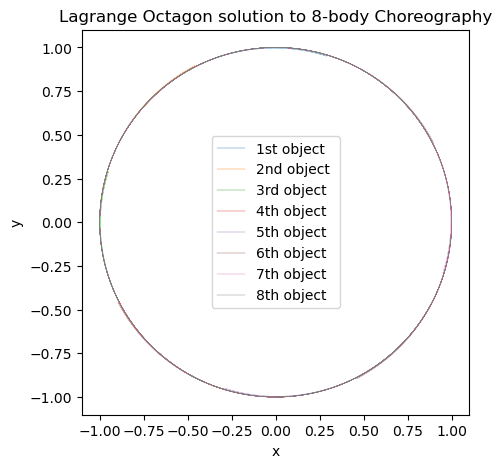

In [16]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='1st object ',lw=0.3)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='2nd object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='3rd object ',lw=0.3)
ax.plot(Obj_4_r[:,0],Obj_4_r[:,1],label='4th object ',lw=0.3)
ax.plot(Obj_5_r[:,0],Obj_5_r[:,1],label='5th object ',lw=0.3)
ax.plot(Obj_6_r[:,0],Obj_6_r[:,1],label='6th object ',lw=0.3)
ax.plot(Obj_7_r[:,0],Obj_7_r[:,1],label='7th object ',lw=0.3)
ax.plot(Obj_8_r[:,0],Obj_8_r[:,1],label='8th object ',lw=0.3)
ax.set_title('Lagrange Octagon solution to 8-body Choreography')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()

[-22.43892677 -22.43892677 -22.43892677 ... -22.44260282 -22.44262488
 -22.44264706]


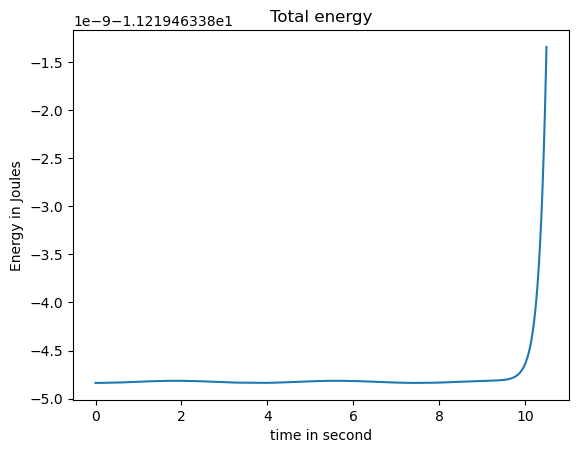

In [17]:
time=np.linspace(0,N*dt,N)
Total_E_8 = KE_8_C + PE_8_C
plt.plot(time,Total_E_8)
plt.title('Total energy')
plt.xlabel('time in second')
plt.ylabel('Energy in Joules')
print(PE_8_C)

Text(0, 0.5, 'Angular momentum in Kg.m2.s-1')

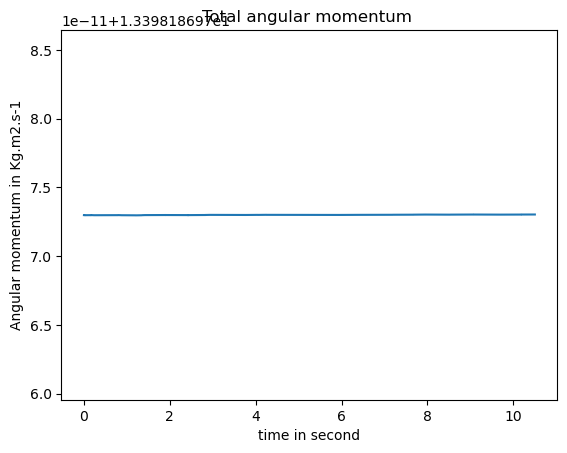

In [18]:

plt.plot(time,L_8_C)
plt.title('Total angular momentum ')
plt.xlabel('time in second')
plt.ylabel('Angular momentum in Kg.m2.s-1')

### Discussion 
The Stability of the 8-body choreography break down after 10500 time step(roughly 10.5 seconds) as shown in the Kinetic energy and total angular momentum plot because there is a sudden increase of KE and L which means the system is no longer obeying the conservation laws. This might be due to small error due to Velocity Verlet that accumulate over time and the system being a chaos system is very sensitive to any change. From the Kinetic Energy graph, we can observe a time period of roughly 3800 timestep rouhgly 3.8 seconds. 
 
 
This suggests that the N-body Choreography system decreases in stability as the number of body increases.

# 11th of March 2023

## 8-figure Choreography
In this section, we will try to simulate the orbit of the 8-figure 3 body choreography system by using the parameter E(x0) given by the research paper which needs to be satisfy in order to obtain the system.

In [141]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 30000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)

# remember that the initial centre of mass is r1_v[0]



# Initial Condition
'''
Placing the three body along a collinear line such that the sum of the position of all the bodies is zero. This is
also the case for the initial velocity
'''

Obj_1_r[0] = np.array([1,0])
Obj_2_r[0] = np.array([-1,0])
Obj_3_r[0] = np.array([0,0])

# Body 3 have double the velocity relative to the other body

# setting velocities along the horizontal and vertical direction which is given by the research paper
v=0.347116768716
u=0.532724944657

Obj_1_v[0] = np.array([v,u])
Obj_2_v[0] = np.array([v,u])
Obj_3_v[0] = np.array([-2*v,-2*u])

In [142]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    # Kinetic Energy Calculation
    KE_LS[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               +(0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2)))
    
    # Potential Energy Calculation
    
    PE_LS[i]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[i]-Obj_1_r[i]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-G*m2*m3/ np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]) ) )
    
    
    # Angular momentum calculation
    
    L_LS[i] = (np.linalg.norm(np.cross(Obj_1_v[i],Obj_1_r[i]))
              + np.linalg.norm(np.cross(Obj_2_v[i],Obj_2_r[i]))
              + np.linalg.norm(np.cross(Obj_3_v[i],Obj_3_r[i]))        )
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_LS[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)) +(0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)))

PE_LS[-1]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-G*m2*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]) ) )

L_LS[-1] = (np.linalg.norm(np.cross(Obj_1_v[-1],Obj_1_r[-1]))
              + np.linalg.norm(np.cross(Obj_2_v[-1],Obj_2_r[-1]))
              + np.linalg.norm(np.cross(Obj_3_v[-1],Obj_3_r[-1]))        )

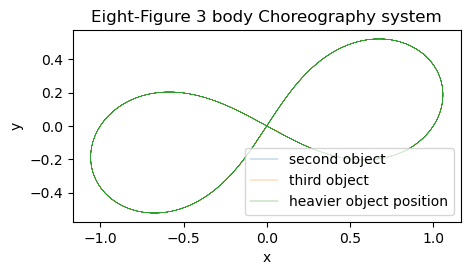

In [143]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='second object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='third object ',lw=0.3)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='heavier object position',lw=0.3)
ax.set_title('Eight-Figure 3 body Choreography system')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.gca().set_aspect(1)

Text(0, 0.5, 'Sum x or y')

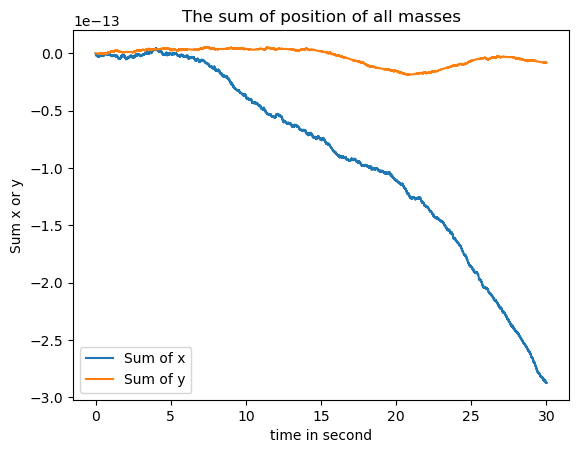

In [144]:
Sum_Position= ((Obj_2_r)+(Obj_1_r)+(Obj_3_r))
time=np.linspace(0,N*dt,N)
plt.plot(time,Sum_Position[:,0],label='Sum of x')
plt.plot(time,Sum_Position[:,1],label='Sum of y')
plt.legend()
plt.title('The sum of position of all masses')
plt.xlabel('time in second')
plt.ylabel('Sum x or y')

Text(0, 0.5, 'Sum Vx or Vy')

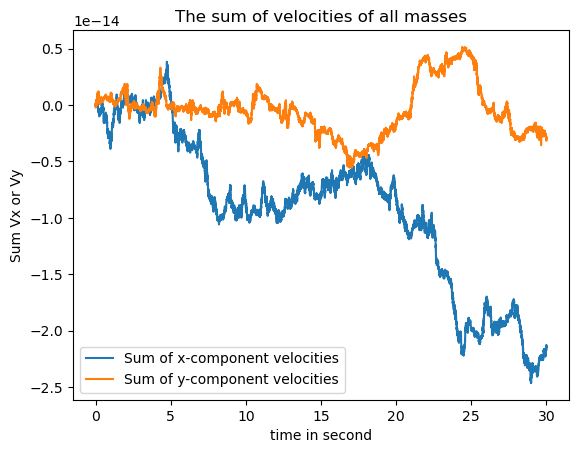

In [145]:
time=np.linspace(0,N*dt,N)
Total_velocity=((Obj_2_v)+(Obj_1_v)+(Obj_3_v))
plt.plot(time,Total_velocity[:,0],label='Sum of x-component velocities')
plt.plot(time,Total_velocity[:,1],label='Sum of y-component velocities')
plt.legend()
plt.title('The sum of velocities of all masses')
plt.xlabel('time in second')
plt.ylabel('Sum Vx or Vy')

[1.06544989 1.06544896 1.06544618 ... 1.01106172 1.01102539 1.01098976]


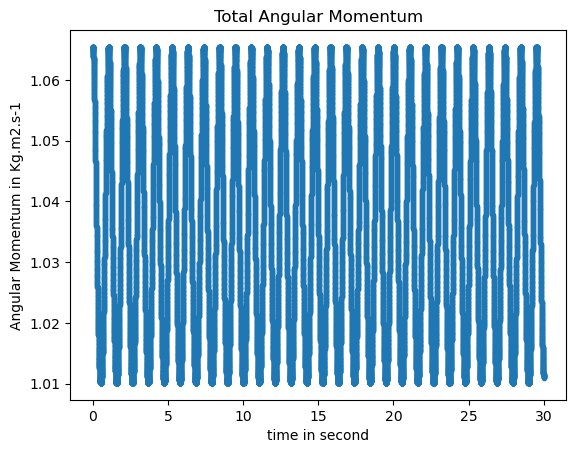

In [146]:
time=np.linspace(0,N*dt,N)
plt.plot(time,L_LS,marker='.')
plt.title('Total Angular Momentum')
plt.xlabel('time in second')
plt.ylabel('Angular Momentum in Kg.m2.s-1')
print(L_LS)

Text(0, 0.5, 'Total Energy in Joules')

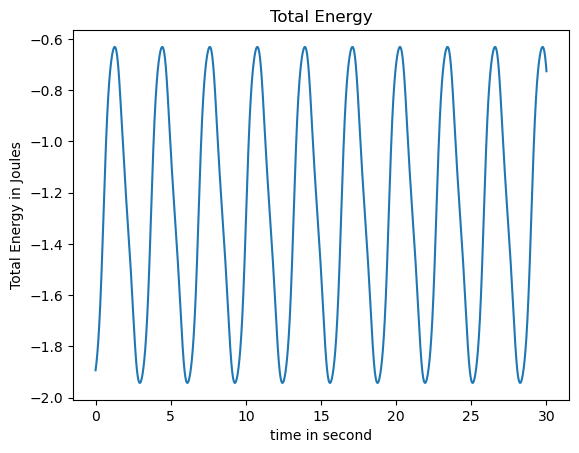

In [147]:

Total_Energy_LS = PE_LS+KE_LS
plt.plot(time,Total_Energy_LS)
plt.title('Total Energy')
plt.xlabel('time in second')
plt.ylabel('Total Energy in Joules')

##  4-body Braids Choreography System


In [168]:
# Same mass 
m1=1
m2=1
m3=1
m4=1

N= 8000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities for all the eight bodies

Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_2_v = np.zeros((N,Ndim))

Obj_3_r = np.zeros((N,Ndim))
Obj_3_v = np.zeros((N,Ndim))

Obj_4_r = np.zeros((N,Ndim))
Obj_4_v = np.zeros((N,Ndim))


# Total energy and angular momentum storage

KE_8_C= np.zeros(N)
PE_8_C= np.zeros(N)
L_8_C= np.zeros(N)

# remember that the initial centre of mass is r1_v[0]

# Initial condition explanations
'''The initial conditions are given by data from the research paper.
'''
x1 = 1.382857
x0_v= 1.87193510824
y1_v= 0.584872579881
a = 0.157029944461

Obj_1_r[0] = np.array([0,a])
Obj_2_r[0] = np.array([x1,0])
Obj_3_r[0] = np.array([0,-a])
Obj_4_r[0] = np.array([-x1,0])



Obj_1_v[0] = np.array([x0_v,0]) * 1.0005
Obj_2_v[0] = np.array([0,y1_v]) * 1.0005
Obj_3_v[0] = np.array([-x0_v,0]) * 1.0005
Obj_4_v[0] = np.array([0,-y1_v]) * 1.0005


In [169]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = ( force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
                  + force(Obj_1_r[i], Obj_4_r[i], m1 , m4) )
    
    Force_on_2 = ( force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
                  + force(Obj_2_r[i], Obj_4_r[i], m4 , m2) 
                 )
    
    
    Force_on_3 = ( force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
                  + force(Obj_3_r[i], Obj_4_r[i], m4 , m3) 
                 )
    
    Force_on_4 = ( force(Obj_4_r[i], Obj_1_r[i], m1 , m4) + force(Obj_4_r[i],Obj_2_r[i],m2,m4)
                  + force(Obj_4_r[i], Obj_3_r[i], m4 , m3)
                 )
    

    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    Obj_4_r[i+1] = Obj_4_r[i] + (dt* Obj_4_v[i]) + (dt**2) * (Force_on_4/(2*m4))

    # Forces on objects at step i+1
    
    Force_on_1_ip1 = ( force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
                  + force(Obj_1_r[i+1], Obj_4_r[i+1], m1 , m4) )
    
    Force_on_2_ip1 = ( force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
                  + force(Obj_2_r[i+1], Obj_4_r[i+1], m4 , m2)
                 )
    
    
    Force_on_3_ip1 = ( force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
                  + force(Obj_3_r[i+1], Obj_4_r[i+1], m4 , m3)
                 )
    
    Force_on_4_ip1 = ( force(Obj_4_r[i+1], Obj_1_r[i+1], m1 , m4) + force(Obj_4_r[i+1],Obj_2_r[i+1],m2,m4)
                  + force(Obj_4_r[i+1], Obj_3_r[i+1], m4 , m3) 
                 )
   
    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    Obj_4_v[i+1] = Obj_4_v[i] + dt*(Force_on_4+Force_on_4_ip1)/(2*m4)

    # Kinetic Energy Calculation
    KE_8_C[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[i])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[i])**2))
               )
    
    PE_8_C[i]=( (-1/np.linalg.norm(Obj_2_r[i]-Obj_1_r[i])) + (-1/np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]))
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_4_r[i]-Obj_3_r[i]) ))
          
    
    L_8_C[i] = (np.linalg.norm(np.cross(Obj_1_v[i],Obj_1_r[i]))
              + np.linalg.norm(np.cross(Obj_2_v[i],Obj_2_r[i]))
              + np.linalg.norm(np.cross(Obj_3_v[i],Obj_3_r[i]))
              + np.linalg.norm(np.cross(Obj_4_v[i],Obj_4_r[i])))
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_8_C[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[-1])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[-1])**2))
               )

PE_8_C[-1]=( (-1/np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1])) + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]))
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_3_r[-1]) ))

L_8_C[-1] = (np.linalg.norm(np.cross(Obj_1_v[-1],Obj_1_r[-1]))
              + np.linalg.norm(np.cross(Obj_2_v[-1],Obj_2_r[-1]))
              + np.linalg.norm(np.cross(Obj_3_v[-1],Obj_3_r[-1]))
              + np.linalg.norm(np.cross(Obj_4_v[-1],Obj_4_r[-1])))


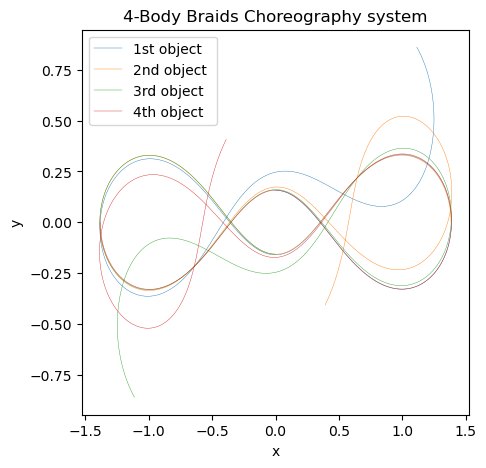

In [170]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='1st object ',lw=0.3)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='2nd object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='3rd object ',lw=0.3)
ax.plot(Obj_4_r[:,0],Obj_4_r[:,1],label='4th object ',lw=0.3)
ax.set_title('4-Body Braids Choreography system')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()

[-6.41976776 -6.41965317 -6.41930951 ... -3.88428826 -3.8838934
 -3.88350306]


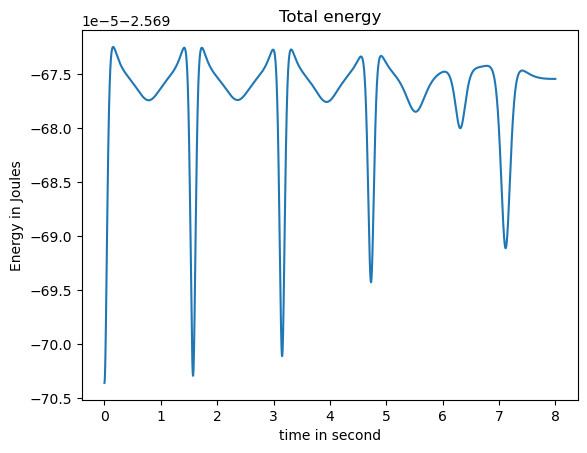

In [171]:
time=np.linspace(0,N*dt,N)
Total_E_8 = KE_8_C + PE_8_C
plt.plot(time,Total_E_8)
plt.title('Total energy')
plt.xlabel('time in second')
plt.ylabel('Energy in Joules')
print(PE_8_C)


Text(0, 0.5, 'Angular momentum in Kg.m2.s-1')

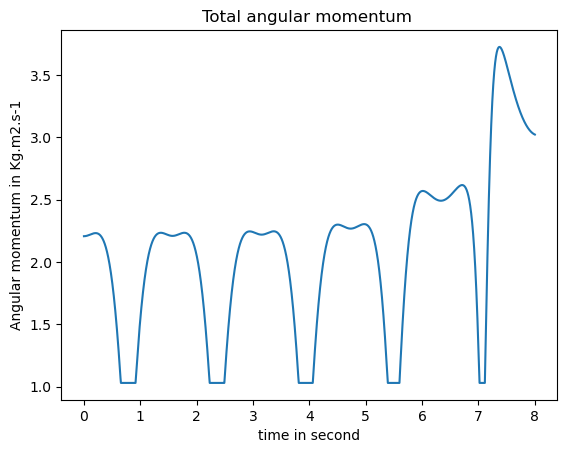

In [172]:

plt.plot(time,L_8_C)
plt.title('Total angular momentum ')
plt.xlabel('time in second')
plt.ylabel('Angular momentum in Kg.m2.s-1')

# 13rd of March 2023

## 6-Body Braids Choreography system

In [198]:
# Same mass 
m1=1
m2=1
m3=1
m4=1
m5=1
m6=1

N= 4000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities for all the eight bodies

Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_2_v = np.zeros((N,Ndim))

Obj_3_r = np.zeros((N,Ndim))
Obj_3_v = np.zeros((N,Ndim))

Obj_4_r = np.zeros((N,Ndim))
Obj_4_v = np.zeros((N,Ndim))

Obj_5_r = np.zeros((N,Ndim))
Obj_5_v = np.zeros((N,Ndim))

Obj_6_r = np.zeros((N,Ndim))
Obj_6_v = np.zeros((N,Ndim))

# Total energy and angular momentum storage

KE_8_C= np.zeros(N)
PE_8_C= np.zeros(N)
L_8_C= np.zeros(N)

# remember that the initial centre of mass is r1_v[0]

# Initial condition explanations
'''All Initial conditions are given by the research paper.
'''

x0_v = -0.635277524319
x1 = 0.140342838651
y1 = 0.797833002006
x1_v = 0.100637737317 
y1_v = - 2.0315222786

a=1.887041548253914

Obj_1_r[0] = np.array([x1,-y1])
Obj_2_r[0] = np.array([0,-a])
Obj_3_r[0] = np.array([-x1,-y1])
Obj_4_r[0] = np.array([0,a])
Obj_5_r[0] = np.array([x1,y1])
Obj_6_r[0] = np.array([-x1,y1])


Obj_1_v[0] = np.array([-x1_v,y1_v]) 
Obj_2_v[0] = np.array([-x0_v,0]) 
Obj_3_v[0] = np.array([-x1_v,-y1_v])
Obj_4_v[0] = np.array([x0_v,0])
Obj_5_v[0] = np.array([x1_v,y1_v])
Obj_6_v[0] = np.array([x1_v,-y1_v])


In [194]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = ( force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
                  + force(Obj_1_r[i], Obj_4_r[i], m1 , m4) + force(Obj_1_r[i], Obj_5_r[i], m1 , m5)
                  + force(Obj_1_r[i], Obj_6_r[i], m1 , m6)    )
    
    Force_on_2 = ( force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
                  + force(Obj_2_r[i], Obj_4_r[i], m4 , m2) + force(Obj_2_r[i], Obj_5_r[i], m5 , m2)
                  + force(Obj_2_r[i], Obj_6_r[i], m6 , m2) 
                 )
    
    
    Force_on_3 = ( force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
                  + force(Obj_3_r[i], Obj_4_r[i], m4 , m3) + force(Obj_3_r[i], Obj_5_r[i], m5 , m3)
                  + force(Obj_3_r[i], Obj_6_r[i], m6 , m3) 
                 )
    
    Force_on_4 = ( force(Obj_4_r[i], Obj_1_r[i], m1 , m4) + force(Obj_4_r[i],Obj_2_r[i],m2,m4)
                  + force(Obj_4_r[i], Obj_3_r[i], m4 , m3) + force(Obj_4_r[i], Obj_5_r[i], m5 , m4)
                  + force(Obj_4_r[i], Obj_6_r[i], m6 , m4) 
                 )
    
    Force_on_5 = ( force(Obj_5_r[i], Obj_1_r[i], m1 , m5) + force(Obj_5_r[i],Obj_2_r[i],m2,m5)
                  + force(Obj_5_r[i], Obj_3_r[i], m5 , m3) + force(Obj_5_r[i], Obj_4_r[i], m5 , m4)
                  + force(Obj_5_r[i], Obj_6_r[i], m5 , m6)
                 )
    
    Force_on_6 = ( force(Obj_6_r[i], Obj_1_r[i], m1 , m6) + force(Obj_6_r[i],Obj_2_r[i],m2,m6)
                  + force(Obj_6_r[i], Obj_3_r[i], m6 , m3) + force(Obj_6_r[i], Obj_4_r[i], m6 , m4)
                  + force(Obj_6_r[i], Obj_5_r[i], m6 , m5) 
                 )

    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    Obj_4_r[i+1] = Obj_4_r[i] + (dt* Obj_4_v[i]) + (dt**2) * (Force_on_4/(2*m4))
    Obj_5_r[i+1] = Obj_5_r[i] + (dt* Obj_5_v[i]) + (dt**2) * (Force_on_5/(2*m5))
    Obj_6_r[i+1] = Obj_6_r[i] + (dt* Obj_6_v[i]) + (dt**2) * (Force_on_6/(2*m6))
    
    # Forces on objects at step i+1
    
    Force_on_1_ip1 = ( force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
                  + force(Obj_1_r[i+1], Obj_4_r[i+1], m1 , m4) + force(Obj_1_r[i+1], Obj_5_r[i+1], m1 , m5)
                  + force(Obj_1_r[i+1], Obj_6_r[i+1], m1 , m6) )
    
    Force_on_2_ip1 = ( force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
                  + force(Obj_2_r[i+1], Obj_4_r[i+1], m4 , m2) + force(Obj_2_r[i+1], Obj_5_r[i+1], m5 , m2)
                  + force(Obj_2_r[i+1], Obj_6_r[i+1], m6 , m2) 
                 )
    
    
    Force_on_3_ip1 = ( force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
                  + force(Obj_3_r[i+1], Obj_4_r[i+1], m4 , m3) + force(Obj_3_r[i+1], Obj_5_r[i+1], m5 , m3)
                  + force(Obj_3_r[i+1], Obj_6_r[i+1], m6 , m3)
                 )
    
    Force_on_4_ip1 = ( force(Obj_4_r[i+1], Obj_1_r[i+1], m1 , m4) + force(Obj_4_r[i+1],Obj_2_r[i+1],m2,m4)
                  + force(Obj_4_r[i+1], Obj_3_r[i+1], m4 , m3) + force(Obj_4_r[i+1], Obj_5_r[i+1], m5 , m4)
                  + force(Obj_4_r[i+1], Obj_6_r[i+1], m6 , m4)
                 )
    
    Force_on_5_ip1 = ( force(Obj_5_r[i+1], Obj_1_r[i+1], m1 , m5) + force(Obj_5_r[i+1],Obj_2_r[i+1],m2,m5)
                  + force(Obj_5_r[i+1], Obj_3_r[i+1], m5 , m3) + force(Obj_5_r[i+1], Obj_4_r[i+1], m5 , m4)
                  + force(Obj_5_r[i+1], Obj_6_r[i+1], m5 , m6) 
                 )
    
    Force_on_6_ip1 = ( force(Obj_6_r[i+1], Obj_1_r[i+1], m1 , m6) + force(Obj_6_r[i+1],Obj_2_r[i+1],m2,m6)
                  + force(Obj_6_r[i+1], Obj_3_r[i+1], m6 , m3) + force(Obj_6_r[i+1], Obj_4_r[i+1], m6 , m4)
                  + force(Obj_6_r[i+1], Obj_5_r[i+1], m6 , m5)
                 )
    
   
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    Obj_4_v[i+1] = Obj_4_v[i] + dt*(Force_on_4+Force_on_4_ip1)/(2*m4)
    Obj_5_v[i+1] = Obj_5_v[i] + dt*(Force_on_5+Force_on_5_ip1)/(2*m5)
    Obj_6_v[i+1] = Obj_6_v[i] + dt*(Force_on_6+Force_on_6_ip1)/(2*m6)
    
    # Kinetic Energy Calculation
    KE_8_C[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[i])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[i])**2))
               + (0.5 * (m5*np.linalg.norm(Obj_5_v[i])**2)) + (0.5 * (m6*np.linalg.norm(Obj_6_v[i])**2))
               )
    
    PE_8_C[i]=( (-1/np.linalg.norm(Obj_2_r[i]-Obj_1_r[i])) + (-1/np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_5_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]))
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_5_r[i]-Obj_2_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_4_r[i]-Obj_3_r[i]) )
          + (-1/np.linalg.norm(Obj_5_r[i]-Obj_3_r[i]) ) + (-1/np.linalg.norm(Obj_6_r[i]-Obj_3_r[i]) )
          + (-1/np.linalg.norm(Obj_5_r[i]-Obj_4_r[i]) ) + (-1/np.linalg.norm(Obj_6_r[i]-Obj_4_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_5_r[i]) ))
              
    
    
    L_8_C[i] = ( np.linalg.norm(np.cross(Obj_1_r[i],Obj_1_v[i]))
                +np.linalg.norm(np.cross(Obj_2_r[i],Obj_2_v[i]))
                +np.linalg.norm(np.cross(Obj_3_r[i],Obj_3_v[i]))
                +np.linalg.norm(np.cross(Obj_4_r[i],Obj_4_v[i]))
                +np.linalg.norm(np.cross(Obj_5_r[i],Obj_5_v[i]))
                +np.linalg.norm(np.cross(Obj_6_r[i],Obj_6_v[i]))
               )
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_8_C[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[-1])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[-1])**2))
               + (0.5 * (m5*np.linalg.norm(Obj_5_v[-1])**2)) + (0.5 * (m6*np.linalg.norm(Obj_6_v[-1])**2))
               )

PE_8_C[-1]=( (-1/np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1])) + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]))
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_2_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_3_r[-1]) )
          + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_3_r[-1]) ) + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_3_r[-1]) )
          + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_4_r[-1]) ) + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_4_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_5_r[-1]) ))


              
L_8_C[-1] = ( np.linalg.norm(np.cross(Obj_1_r[-1],Obj_1_v[-1]))
                +np.linalg.norm(np.cross(Obj_2_r[-1],Obj_2_v[-1]))
                +np.linalg.norm(np.cross(Obj_3_r[-1],Obj_3_v[-1]))
                +np.linalg.norm(np.cross(Obj_4_r[-1],Obj_4_v[-1]))
                +np.linalg.norm(np.cross(Obj_5_r[-1],Obj_5_v[-1]))
                +np.linalg.norm(np.cross(Obj_6_r[-1],Obj_6_v[-1])))
    

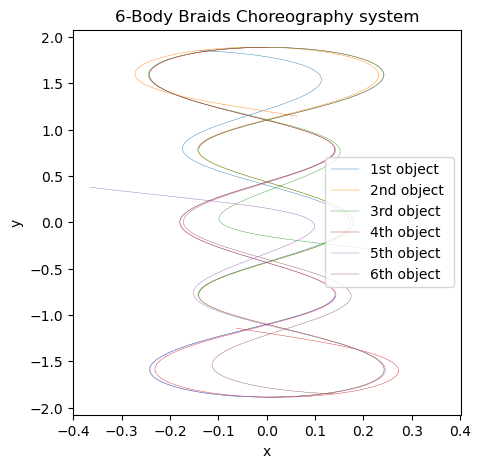

In [195]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='1st object ',lw=0.3)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='2nd object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='3rd object ',lw=0.3)
ax.plot(Obj_4_r[:,0],Obj_4_r[:,1],label='4th object ',lw=0.3)
ax.plot(Obj_5_r[:,0],Obj_5_r[:,1],label='5th object ',lw=0.3)
ax.plot(Obj_6_r[:,0],Obj_6_r[:,1],label='6th object ',lw=0.3)
ax.set_title('6-Body Braids Choreography system')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()

[-15.00828813 -15.00789799 -15.00672801 ... -10.83417342 -10.82745419
 -10.82075948]


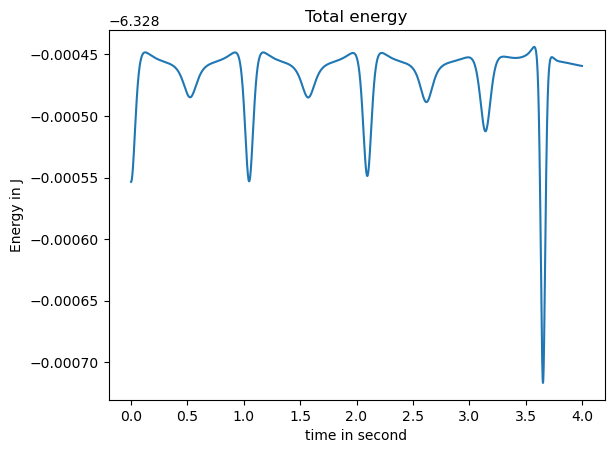

In [196]:
time=np.linspace(0,N*dt,N)
Total_E_8 = KE_8_C + PE_8_C
plt.plot(time,Total_E_8)
plt.title('Total energy')
plt.xlabel('time in second')
plt.ylabel('Energy in J')
print(PE_8_C)


Text(0, 0.5, 'Angular momentum in Kg.m2.s-1')

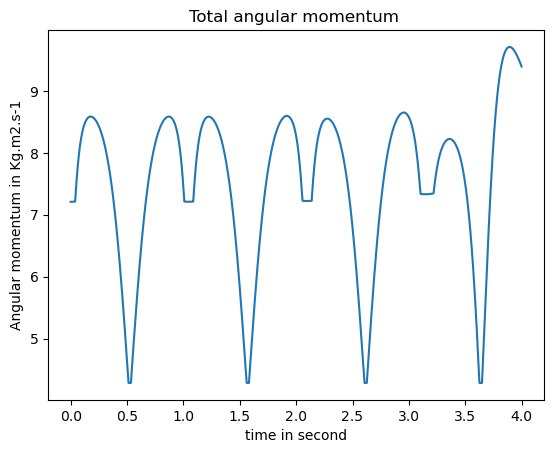

In [197]:
plt.plot(time,L_8_C)
plt.title('Total angular momentum ')
plt.xlabel('time in second')
plt.ylabel('Angular momentum in Kg.m2.s-1')